# **Data Preparation**

Importing dataset

In [3]:

!git clone https://gitlab.com/ykristian/indonesian-trafic-sign-dataset.git/

Cloning into 'indonesian-trafic-sign-dataset'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.
Checking out files: 100% (6/6), done.


In [4]:
!ls

indonesian-trafic-sign-dataset	sample_data


In [5]:
!ls indonesian-trafic-sign-dataset

DatasetDetection.csv		       DatasetSignClassification-11Class.p
DatasetDetection.p		       DatasetSignClassification-44Class.csv
DatasetSignClassification-11Class.csv  DatasetSignClassification-44Class.p


# **Reqired Libraries**

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pickle #we use pickle to convert our image dataset to a single file and need it to read pickle file
import pandas as pd 
import random
import requests
import cv2 #open CV
from PIL import Image #Python Imaging Library (Pillow)

from sklearn.model_selection import train_test_split #to split our dataset

#For our Neural Net we will use Keras with Tensorflow Backend
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical #you can also use pandas get_dummies 
from keras.layers import Dropout, Flatten 
from keras.layers.convolutional import Conv2D, MaxPooling2D

np.random.seed(1010)

In [68]:
with open("indonesian-trafic-sign-dataset/DatasetSignClassification-11Class.p", "rb") as f:
  data = pickle.load(f)

# Split Data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data["train_data"], 
                                   data["label_data"], test_size=0.2, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                   test_size=0.15, random_state=101)

print("X_train Shape:", X_train.shape)
print("X_val Shape:",X_val.shape)
print("X_test Shape:",X_test.shape)

print("y_train Shape:", y_train.shape)
print("y_val Shape:",y_val.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (14069, 96, 96, 3)
X_val Shape: (2483, 96, 96, 3)
X_test Shape: (4138, 96, 96, 3)
y_train Shape: (14069,)
y_val Shape: (2483,)
y_test Shape: (4138,)


In [70]:
dataCSV = pd.read_csv("indonesian-trafic-sign-dataset/DatasetSignClassification-11Class.csv")
dataCSV

,ClassID,SignNames
0,0,Unidentified
1,1,No-Parking
2,2,No-U-Turn
3,3,Speed-Limit-40km
4,4,No-Stopping
5,5,Warning
6,6,Traffic-Light
7,7,Junction
8,8,U-Turn
9,9,Zabra-Cross


[1263, 1515, 1370, 1137, 1113, 1376, 1365, 1379, 1350, 1098, 1103]


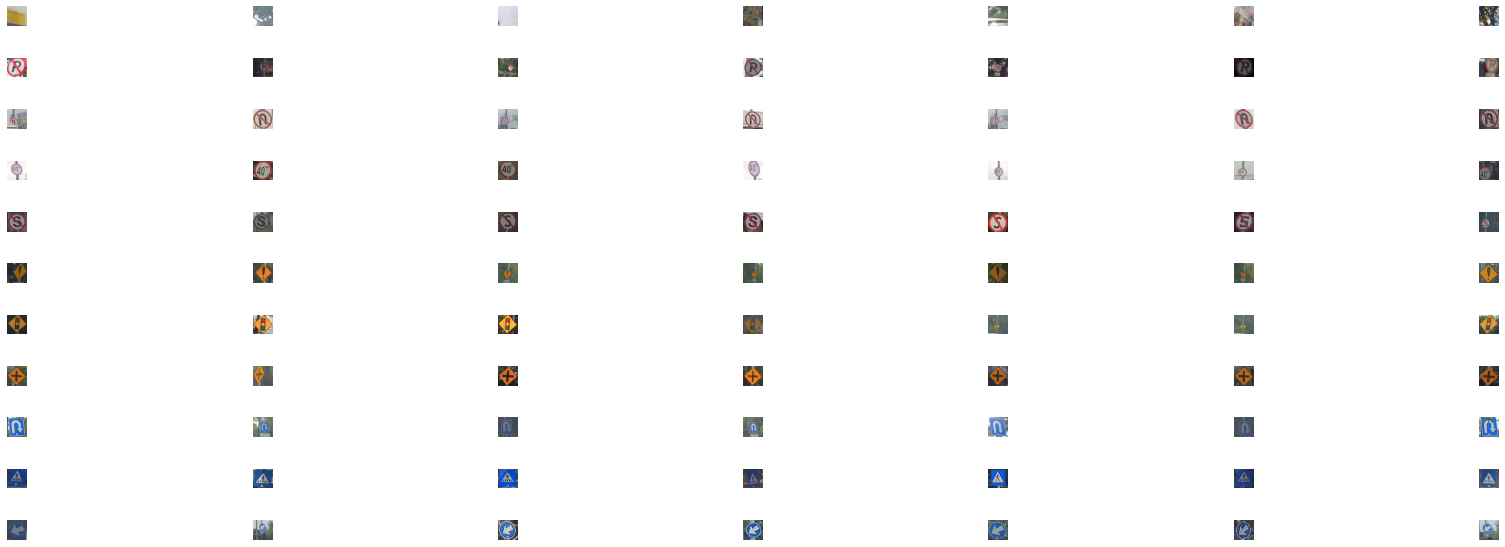

In [71]:
num_of_samples = [] #counting the number of sample for each class
 
cols = 7 #number of col to display
num_classes =11 #number of class
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(24, 8)) #setting up matplotlib 
fig.tight_layout()
for i in range(cols): #for every col
    for j, row in dataCSV.iterrows(): #for every class
        x_selected = X_train[y_train == j] #select only X that have current j label
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap="gray") #randomly show X
        axs[j][i].axis("off")
        if i == 3: #for the midle col
            num_of_samples.append(len(x_selected)) #register the sample count
            
print(num_of_samples)

# **Preprocess**

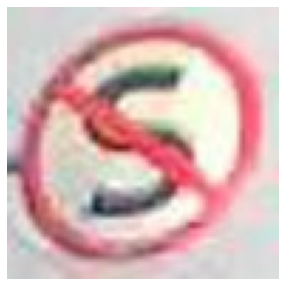

In [72]:
def tampil(img):
  plt.figure(figsize=(5,5))
  plt.axis("off")
  plt.imshow(img,cmap="gray")
  
random_index = random.randint(9000,10000)
tampil(X_train[random_index])

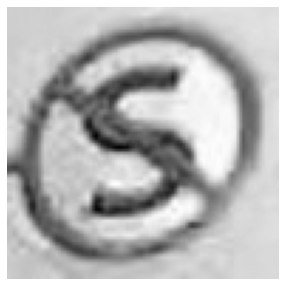

In [73]:
def grayscale(img):
  img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img1

gray = grayscale(X_train[random_index])
tampil(gray)

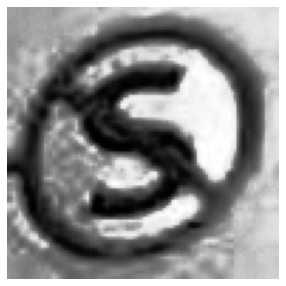

In [74]:
def equalize(img):
  img1 = cv2.equalizeHist(img)
  return img1

eq = equalize(gray)
tampil(eq)

In [75]:
def preprocessing(img):
  gray = grayscale(img)
  eq = equalize(gray)
  norm = eq/255
  return norm

new_X_train=[]
for i in range(X_train.shape[0]):
  new_X_train.append(preprocessing(X_train[i]))  
X_train = np.array(new_X_train)

new_X_val=[]
for i in range(X_val.shape[0]):
  new_X_val.append(preprocessing(X_val[i]))  
X_val = np.array(new_X_val)

new_X_test=[]
for i in range(X_test.shape[0]):
  new_X_test.append(preprocessing(X_test[i]))  
X_test = np.array(new_X_test)

In [76]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

print("y_train Shape:", y_train.shape)
print("y_val Shape:",y_val.shape)
print("y_test Shape:",y_test.shape)

y_train Shape: (14069, 11)
y_val Shape: (2483, 11)
y_test Shape: (4138, 11)


In [77]:
print("X_train Shape:", X_train.shape)
print("X_val Shape:",X_val.shape)
print("X_test Shape:",X_test.shape)

#add a dept dimension to all of our X
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print("X_train Shape:", X_train.shape)
print("X_val Shape:",X_val.shape)
print("X_test Shape:",X_test.shape)

X_train Shape: (14069, 96, 96)
X_val Shape: (2483, 96, 96)
X_test Shape: (4138, 96, 96)
X_train Shape: (14069, 96, 96, 1)
X_val Shape: (2483, 96, 96, 1)
X_test Shape: (4138, 96, 96, 1)


#**Neural Network**

My model

In [78]:
def Conv_Net_model():
  model = Sequential()
  model.add(Conv2D(100,(3,3), input_shape=(96,96,1), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(120,(5,5), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(140,(3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.5))
  model.add(Flatten())
  model.add(Dense(200, activation="relu"))
  model.add(Dropout(rate=0.5))
  model.add(Dense(100, activation="relu"))
  model.add(Dropout(rate=0.5))
  model.add(Dense(num_classes, activation="sigmoid"))
  model.compile(Adam(lr=0.001), loss = "binary_crossentropy", metrics = ["accuracy"])
  return model

model = Conv_Net_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 100)       1000      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 100)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 43, 43, 120)       300120    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 21, 21, 120)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 19, 19, 140)       151340    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 9, 140)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 9, 9, 140)        

In [79]:
h = model.fit(X_train, y_train, epochs=20, validation_data = (X_val, y_val), 
                batch_size=400, verbose=1, shuffle=1)

Epoch 1/20
36/36 [==============================] - 11s 290ms/step - loss: 0.5107 - accuracy: 0.0925 - val_loss: 0.3095 - val_accuracy: 0.0950
Epoch 2/20
36/36 [==============================] - 10s 289ms/step - loss: 0.3486 - accuracy: 0.0979 - val_loss: 0.3011 - val_accuracy: 0.2384
Epoch 3/20
36/36 [==============================] - 11s 294ms/step - loss: 0.3093 - accuracy: 0.1989 - val_loss: 0.1900 - val_accuracy: 0.7000
Epoch 4/20
36/36 [==============================] - 10s 290ms/step - loss: 0.2268 - accuracy: 0.4868 - val_loss: 0.0965 - val_accuracy: 0.8107
Epoch 5/20
36/36 [==============================] - 10s 288ms/step - loss: 0.1549 - accuracy: 0.6799 - val_loss: 0.0631 - val_accuracy: 0.8808
Epoch 6/20
36/36 [==============================] - 10s 286ms/step - loss: 0.1084 - accuracy: 0.7905 - val_loss: 0.0413 - val_accuracy: 0.9174
Epoch 7/20
36/36 [==============================] - 10s 286ms/step - loss: 0.0844 - accuracy: 0.8378 - val_loss: 0.0298 - val_accuracy: 0.9468

Text(0.5, 1.0, 'Loss')

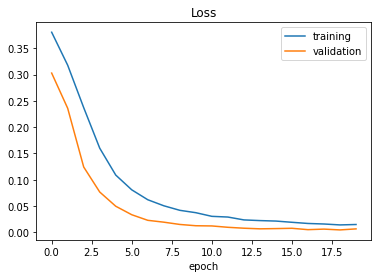

In [ ]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])
plt.legend(["training","validation"])
plt.xlabel("epoch")
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

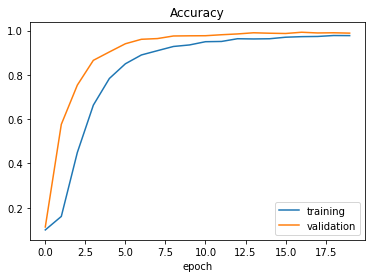

In [ ]:
plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.legend(["training","validation"])
plt.xlabel("epoch")
plt.title("Accuracy")

In [80]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy = ", score[1])

Accuracy =  0.9869502186775208


# **Network2**

In [81]:
with open("indonesian-trafic-sign-dataset/DatasetDetection.p", "rb") as f:
  data = pickle.load(f)

In [82]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data["train_data"], 
                                   data["label_data"], test_size=0.2, random_state=101)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, 
                                   test_size=0.15, random_state=101)

print("X_train Shape:", X_train2.shape)
print("X_val Shape:",X_val2.shape)
print("X_test Shape:",X_test2.shape)

print("y_train Shape:", y_train2.shape)
print("y_val Shape:",y_val2.shape)
print("y_test Shape:",y_test2.shape)

X_train Shape: (13917, 64, 64, 3)
X_val Shape: (2457, 64, 64, 3)
X_test Shape: (4094, 64, 64, 3)
y_train Shape: (13917,)
y_val Shape: (2457,)
y_test Shape: (4094,)


In [83]:
dataCSV = pd.read_csv("indonesian-trafic-sign-dataset/DatasetDetection.csv")
dataCSV

,ClassID,RambuOrNot
0,0,Non Rambu
1,1,Rambu


In [84]:
new_X_train2=[]
for i in range(X_train2.shape[0]):
  new_X_train2.append(preprocessing(X_train2[i]))  
X_train2 = np.array(new_X_train2)

new_X_val2=[]
for i in range(X_val2.shape[0]):
  new_X_val2.append(preprocessing(X_val2[i]))  
X_val2 = np.array(new_X_val2)

new_X_test2=[]
for i in range(X_test2.shape[0]):
  new_X_test2.append(preprocessing(X_test2[i]))  
X_test2 = np.array(new_X_test2)

In [85]:
y_train2 = pd.get_dummies(y_train2)
y_test2 = pd.get_dummies(y_test2)
y_val2 = pd.get_dummies(y_val2)

print("y_train Shape:", y_train2.shape)
print("y_val Shape:",y_val2.shape)
print("y_test Shape:",y_test2.shape)

y_train Shape: (13917, 2)
y_val Shape: (2457, 2)
y_test Shape: (4094, 2)


In [86]:
print("X_train Shape:", X_train2.shape)
print("X_val Shape:",X_val2.shape)
print("X_test Shape:",X_test2.shape)

#add a dept dimension to all of our X
X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], X_train2.shape[2], 1)
X_val2 = X_val2.reshape(X_val2.shape[0], X_val2.shape[1], X_val2.shape[2], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], X_test2.shape[2], 1)

print("X_train Shape:", X_train2.shape)
print("X_val Shape:",X_val2.shape)
print("X_test Shape:",X_test2.shape)

X_train Shape: (13917, 64, 64)
X_val Shape: (2457, 64, 64)
X_test Shape: (4094, 64, 64)
X_train Shape: (13917, 64, 64, 1)
X_val Shape: (2457, 64, 64, 1)
X_test Shape: (4094, 64, 64, 1)


In [87]:
num_classes2=2

def Conv_Net_model2():
  model = Sequential()
  model.add(Conv2D(100,(3,3), input_shape=(64,64,1), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(120,(5,5), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(140,(3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.5))
  model.add(Flatten())
  model.add(Dense(200, activation="relu"))
  model.add(Dropout(rate=0.5))
  model.add(Dense(100, activation="relu"))
  model.add(Dropout(rate=0.5))
  model.add(Dense(num_classes2, activation="softmax"))
  model.compile(Adam(lr=0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])
  return model

model2 = Conv_Net_model2()
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 100)       1000      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 100)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 27, 27, 120)       300120    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 120)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 140)       151340    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 140)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 5, 140)        

In [88]:
h = model2.fit(X_train2, y_train2, epochs=20, validation_data = (X_val2, y_val2), 
                batch_size=400, verbose=1, shuffle=1)

Epoch 1/20
35/35 [==============================] - 5s 122ms/step - loss: 0.5486 - accuracy: 0.7775 - val_loss: 0.4718 - val_accuracy: 0.7932
Epoch 2/20
35/35 [==============================] - 4s 117ms/step - loss: 0.4528 - accuracy: 0.7903 - val_loss: 0.3685 - val_accuracy: 0.8148
Epoch 3/20
35/35 [==============================] - 4s 118ms/step - loss: 0.3530 - accuracy: 0.8444 - val_loss: 0.2506 - val_accuracy: 0.9003
Epoch 4/20
35/35 [==============================] - 4s 119ms/step - loss: 0.2477 - accuracy: 0.9024 - val_loss: 0.2284 - val_accuracy: 0.9056
Epoch 5/20
35/35 [==============================] - 4s 120ms/step - loss: 0.2105 - accuracy: 0.9186 - val_loss: 0.1669 - val_accuracy: 0.9333
Epoch 6/20
35/35 [==============================] - 4s 121ms/step - loss: 0.1724 - accuracy: 0.9345 - val_loss: 0.1430 - val_accuracy: 0.9442
Epoch 7/20
35/35 [==============================] - 4s 120ms/step - loss: 0.1434 - accuracy: 0.9463 - val_loss: 0.1161 - val_accuracy: 0.9565
Epoch 

In [89]:
score = model2.evaluate(X_test2, y_test2, verbose=0)
print("Accuracy = ", score[1])

Accuracy =  0.9829018115997314


# **Photo Detection**

In [90]:
def getCalssName(classNo):
  if   classNo == 0: return 'Unidentified'
  elif classNo == 1: return 'No parking'
  elif classNo == 2: return 'No-U-Turn'
  elif classNo == 3: return 'Speed-Limit-40km'
  elif classNo == 4: return 'No-Stopping'
  elif classNo == 5: return '	Warning'
  elif classNo == 6: return '	Traffic-Light'
  elif classNo == 7: return 'Junction'
  elif classNo == 8: return '	U-Turn'
  elif classNo == 9: return '	Zabra-Cross'
  elif classNo == 10: return 'Follow Path'

In [91]:
def getCalssName2(classNo):
  if   classNo == 0: return 'Unidentified'
  if   classNo == 1: return 'NEW SIGN'

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


No parking
Unidentified
--------New classs of Unidentified Object Unidentified-----------------------------
Junction
Unidentified
--------New classs of Unidentified Object Unidentified-----------------------------
	U-Turn
Unidentified
--------New classs of Unidentified Object Unidentified-----------------------------
No-U-Turn
Unidentified
--------New classs of Unidentified Object NEW SIGN-----------------------------


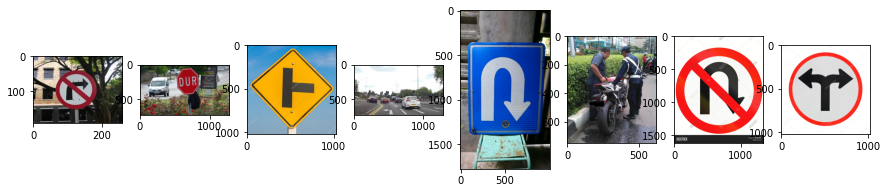

(8, 96, 96, 3)


In [106]:
urls=[]
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvR1kc8ul61KfpKP7TtuF9TtXhC7E_vi3O_3H4RkM-UvvaGn1U")
urls.append("https://static.daktilo.com/sites/577/uploads/2020/06/13/26490647-1592064905.jpg")
urls.append("https://st.depositphotos.com/1173606/3973/i/950/depositphotos_39736081-stock-photo-road-sign-on-sky-backgroundjunction.jpg")
urls.append("https://brightcove04pmdo-a.akamaihd.net/4221396001/4221396001_5464737278001_5464737515001-vs.jpg?pubId=4221396001&videoId=5464737515001")
urls.append("https://s2.bukalapak.com/img/2205643702/w-1000/Rambu_Marka_Jalan_Petunjuk_Turnback_Putar_Balik_.png")
urls.append("https://i2.wp.com/kobayogas.com/wp-content/uploads/2016/12/cbr1000rr-irfan-farhan-motovlogger-kecelakaan-1-e1481808673273.jpg?resize=626%2C753")
urls.append("https://static1.bigstockphoto.com/5/2/9/large1500/92580206.jpg")
urls.append("https://st.depositphotos.com/1173606/5170/i/950/depositphotos_51706733-stock-photo-crossroads-sign.jpg")


imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True)
  img1 = np.array(Image.open(r.raw))
  plt.subplot(1,len(urls),u+1)
  plt.imshow(img1)
  #resize to same size before appending to imgs so we can maintain np array dimension
  img = cv2.resize(img1, (96,96))
  imgs.append(img)
  img=preprocessing(img)
  img = img.reshape(1,96,96,1)
  print(getCalssName(model.predict_classes(img)))
  if (model.predict_classes(img))==0:
    img1 = cv2.resize(img1, (64,64))
    img1=preprocessing(img1)
    img1 = img1.reshape(1,64,64,1)
    print('--------New classs of Unidentified Object '+getCalssName2(model2.predict_classes(img1))+'-----------------------------')
      
plt.show()

imgs = np.array(imgs)
print (imgs.shape)

# **VIDEO FORMATTING**

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img1 = js_to_image(js_reply["img"])

    img= np.asarray(img1)
    img = cv2.resize(img, (96,96))

    # grayscale image for face detection
    img=preprocessing(img)
    img = img.reshape(1,96,96,1)

    threshold = 0.82         # PROBABLITY THRESHOLD
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(img1, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(img1, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

    
    
    #y_pred = model.predict_classes(gray)
    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
    #print(getCalssName(classIndex))
      print(str(classIndex)+" "+str(getCalssName(classIndex)))
      print(str(round(probabilityValue*100,2) ))
